# Udacity Project: Investigating TMDB Dataset 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report TMDb Movies dataset will be analyzed.

>Data will be cleaned first, irrelevant columns will be dropped and then there will be another iteration to analyze production companies due to multiple entries of production company name in one cell

 
>This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consists of 21 columns such as imdb_id, revenue, budget, vote_count, etc. 
#### **Question that can be analyzed from this data set**
- Which companies produce the most popular movies?

- Is there any relationship between popularity and budget adj if so how?
- Is there any relationship between popularity and mean budget_adj, and vote count?



<a id='wrangling'></a>

## Data Wrangling

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
%matplotlib inline
import datetime
df= pd.read_csv('tmdb-movies (3).csv')

#### General Properties

In [3]:

df.head(5)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
# check if there are different release year to take into consideration the inflation rate
df['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

## My Analysis will be about the relationship between popularity and budget_adj, production companies, and vote_count. 

Note that budget_adj is used instead of a budget, this is because this data set is composed of entries from different years, therefore considering inflation will give us more accurate results.

In [8]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
# Lets drop the columns we wont be using for the analysis. (I still would like to keep the original_title to build to_be_watched list for myself =))
df.drop(['id', 'imdb_id','budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'release_date',
        'vote_average', 'release_year','revenue_adj'],axis =1, inplace = True)
df.head()

,popularity,production_companies,vote_count,budget_adj
0,32.985763,Universal Studios|Amblin Entertainment|Legenda...,5562,1.379999e+08
1,28.419936,Village Roadshow Pictures|Kennedy Miller Produ...,6185,1.379999e+08
2,13.112507,Summit Entertainment|Mandeville Films|Red Wago...,2480,1.012000e+08
3,11.173104,Lucasfilm|Truenorth Productions|Bad Robot,5292,1.839999e+08
4,9.335014,Universal Pictures|Original Film|Media Rights ...,2947,1.747999e+08


In [10]:
df.shape

(10866, 4)

## Data Cleaning 
<br>
After cleaning, budget_adj value will be converted to millions, and popularity data will be rounded to 1 digit for easier calculation
<br> 
 Dataframe "pc_analysis" will also be created for production companies analysis

In [11]:
#Lets drop duplicates if any.
print('number of duplicated rows:{}'.format(df.duplicated().sum()))
print(' ')
df.drop_duplicates(inplace=True)
print('Duplicate row is dropped.')

number of duplicated rows:2
 
Duplicate row is dropped.


In [12]:
#Let's check if there is any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 0 to 10865
Data columns (total 4 columns):
popularity              10864 non-null float64
production_companies    9835 non-null object
vote_count              10864 non-null int64
budget_adj              10864 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 424.4+ KB


In [13]:
# Drop rows with missing data i.e production_companies
df.dropna(inplace = True )


In [14]:
#Lets check if there is any numerical data filled with ie. missing:
print(df[df["popularity"]==0].sum())
print(' -----')
print(df[df["vote_count"]==0].sum())
print(' -----')
print(df[df["budget_adj"]==0].sum())

popularity              0.0
production_companies    0.0
vote_count              0.0
budget_adj              0.0
dtype: float64
 -----
popularity              0.0
production_companies    0.0
vote_count              0.0
budget_adj              0.0
dtype: float64
 -----
popularity                                                        1704.85
production_companies    BBC Films|See-Saw Films|FilmNation Entertainme...
vote_count                                                         231424
budget_adj                                                              0
dtype: object


In [15]:
# There are missing budget_adj values, drop them
df=df[df['budget_adj'] !=0]
df.shape
df.head()


,popularity,production_companies,vote_count,budget_adj
0,32.985763,Universal Studios|Amblin Entertainment|Legenda...,5562,1.379999e+08
1,28.419936,Village Roadshow Pictures|Kennedy Miller Produ...,6185,1.379999e+08
2,13.112507,Summit Entertainment|Mandeville Films|Red Wago...,2480,1.012000e+08
3,11.173104,Lucasfilm|Truenorth Productions|Bad Robot,5292,1.839999e+08
4,9.335014,Universal Pictures|Original Film|Media Rights ...,2947,1.747999e+08


In [16]:
# Let's convert budget_adj to millions and round to make it readable

df['budget_adj']=df['budget_adj'].apply(lambda x: x/1000000)

df['budget_adj']=df['budget_adj'].apply(lambda x: round(x))

df['budget_adj']
df.head()

,popularity,production_companies,vote_count,budget_adj
0,32.985763,Universal Studios|Amblin Entertainment|Legenda...,5562,138
1,28.419936,Village Roadshow Pictures|Kennedy Miller Produ...,6185,138
2,13.112507,Summit Entertainment|Mandeville Films|Red Wago...,2480,101
3,11.173104,Lucasfilm|Truenorth Productions|Bad Robot,5292,184
4,9.335014,Universal Pictures|Original Film|Media Rights ...,2947,175


In [17]:
df['popularity']=df['popularity'].apply(lambda x: round(x,1))
df.head()

,popularity,production_companies,vote_count,budget_adj
0,33.0,Universal Studios|Amblin Entertainment|Legenda...,5562,138
1,28.4,Village Roadshow Pictures|Kennedy Miller Produ...,6185,138
2,13.1,Summit Entertainment|Mandeville Films|Red Wago...,2480,101
3,11.2,Lucasfilm|Truenorth Productions|Bad Robot,5292,184
4,9.3,Universal Pictures|Original Film|Media Rights ...,2947,175


In [18]:
df.dtypes

popularity              float64
production_companies     object
vote_count                int64
budget_adj                int64
dtype: object

### New Dataframe for analyzing production companies ( will be used in the second question)
Note that the production_companies column is not suitable for analysis, due to separator between columns and multiple entries in columns.
Let's create a df that will enable us to analyze production_companies data.

In [19]:
# Create 5 df copies to divide distinct entries in each column
dfc=df.copy()

dfc['p1'], dfc['p2'] = dfc['production_companies'].str.split('|', 1).str

arr =['p1','p2','p3','p4','p5']
for i in range(3):
     dfc[arr[i+1]], dfc[arr[i+2]] = dfc[arr[i+1]].str.split('|', 1).str
 
del dfc['production_companies']


In [20]:
# Now that we have split each name of the production company into distinct columns, we can create dataframe for each column of production companies
# create sub-dataframes according to # of production companies

pc_analysis = pd.DataFrame(columns = ['popularity',  'vote_count','budget_adj', 'prod_company'])
i=0
for i in [0,1,2,3,4]:
    pd1=pd.DataFrame(dfc.iloc[:,[0,1,2,i+3]])
    pd1.rename(columns={pd1.columns[3]:"prod_company"}, inplace = True)
    pc_analysis=pc_analysis.append(pd1,sort =False)


In [21]:
#Now drop entries with NaN values
# Drop rows with missing data i.e production_companies
pc_analysis.dropna(inplace = True )
pc_analysis.dtypes
pc_analysis['vote_count'] =pc_analysis['vote_count'].astype(int)
pc_analysis['budget_adj'] =pc_analysis['budget_adj'].astype(int)


Now that we have pc_analysis dataframe for production company analysis, there are only one entry in each row of prod_company



## Exploratory Data Analysis

## QUESTION 1:Is there any relationship between popularity and budget adj if so how?

#### 1- a Let's explore popularity versus budget and how their histograms distributed
#### We wont answer the question 1 here, this part is drawn to understand main characteristics

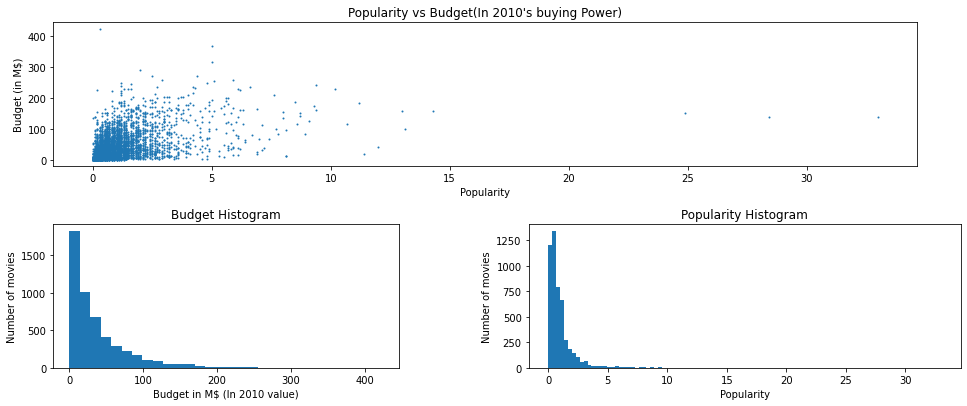

In [22]:
plt.axes ([0.05,1,2,0.5])
plt.scatter(df['popularity'],df['budget_adj'],s=1)
plt.title("Popularity vs Budget(In 2010's buying Power)")
plt.xlabel('Popularity')
plt.ylabel("Budget (in M$)")


plt.axes ([0.05,0.3,0.8,0.5])
plt.hist (df['budget_adj'], bins=30);
plt.title("Budget Histogram")
plt.xlabel('Budget in M$ (In 2010 value)')
plt.ylabel("Number of movies")

plt.axes ([1.15,0.3,1,0.5])
plt.hist(df['popularity'],bins = 100);
plt.title("Popularity Histogram")
plt.xlabel('Popularity')
plt.ylabel("Number of movies");


Note 1-a
We saw that budget and popularity is skewed to the right.
Also, our scatterplot is impossible to read, therefore data will be grouped in part b to understand the relationship

#### 1-b we will group films according to their popularity to find the relationship

In [23]:
min(df['popularity']),max(df['popularity'])

(0.0, 33.0)

In [24]:
my_arr=[]
for x in np.arange(0.0,33.1,0.1):
    a=(x,df.query('popularity == @x').budget_adj.mean())
    my_arr.append(a)

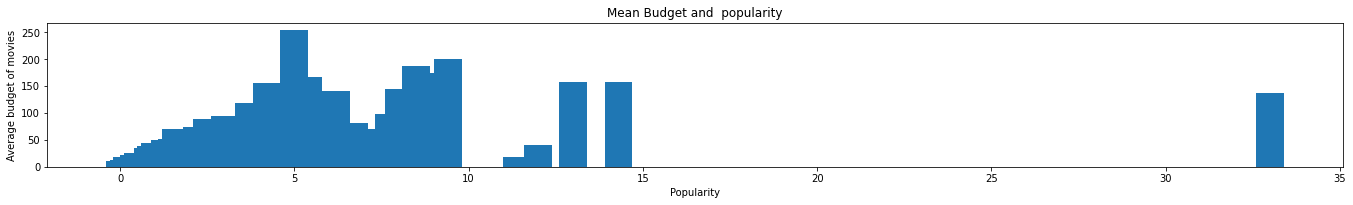

In [25]:
plt.axes ([0.05,0.05,3,0.5])

pb = pd.DataFrame(my_arr, columns =['Popularity', 'AverageBudget_adj'])
pb.dropna(inplace = True)
plt.bar(pb['Popularity'],pb['AverageBudget_adj']);


plt.title("Mean Budget and  popularity")
plt.xlabel('Popularity')
plt.ylabel("Average budget of movies");

Note 1-b1
As you can see above there is no direct relationship between popularity and budget. However, it seems that there is an upward trend between popularity 0 to 5.
Lets look at that part closer:
    

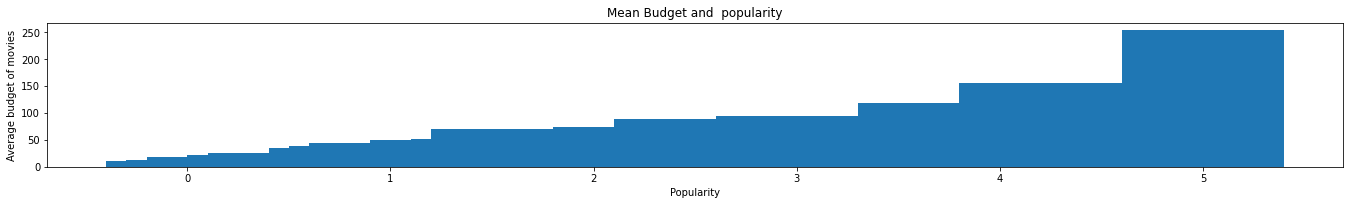

In [26]:
plt.axes ([0.05,0.05,3,0.5])
lower_than_5 =pb[pb['Popularity']<=5]
plt.bar(lower_than_5['Popularity'],lower_than_5['AverageBudget_adj']);
plt.title("Mean Budget and  popularity")
plt.xlabel('Popularity')
plt.ylabel("Average budget of movies");

#### Question 1 Conclusion
___Average budget of movies increases who has popularity between 0-5. However there is no direct correlation between average budget and corresponding popularity when popularity is bigger than 5

    

##  QUESTION 2 
## Which companies produce the most popular movies?
## Is there any relationship between popularity and mean budget_adj, and vote count?

#### 2-a Top 10 Companies who produces the most popular movies on average ( Note that only those with 30+ movies are considered)

Having produced 30 films  is set as a prerequisite in order to be able to find companies who produced the most popular films
Note that there are companies with only 1 film. Considering companies with more than 30 films will be much fairer.

In [27]:
pc_count=pc_analysis.groupby('prod_company').count()
pc_count.head()

,popularity,vote_count,budget_adj
prod_company,,,
"""DIA"" Productions GmbH & Co. KG",1,1,1
100 Feet Productions,1,1,1
1019 Entertainment,1,1,1
10th Hole Productions,3,3,3
11:11 Mediaworks,1,1,1


In [28]:
#lets find the companies who produced more than 30 films.

movie30 = pc_count.query('popularity>30')
movie30.head()

,popularity,vote_count,budget_adj
prod_company,,,
20th Century Fox,46,46,46
Amblin Entertainment,52,52,52
BBC Films,35,35,35
Canal+,56,56,56
Castle Rock Entertainment,42,42,42


In [29]:
# Filter the companies in pc_analysis dataframe with  30 or movies
pc_30 = pc_analysis.loc[pc_analysis.prod_company.isin(movie30.index)]
pc_30.dtypes

popularity      float64
vote_count        int32
budget_adj        int32
prod_company     object
dtype: object

In [30]:
# Our analysis will be about production companies, therefore lets group by and find their overall performance
pc_30.groupby("prod_company").mean().head()

,popularity,vote_count,budget_adj
prod_company,,,
20th Century Fox,0.623913,266.717391,44.782609
Amblin Entertainment,2.244231,1236.423077,82.596154
BBC Films,0.674286,194.171429,17.628571
Canal+,1.175000,485.857143,34.071429
Castle Rock Entertainment,0.976190,404.309524,48.214286


In [31]:
#pc_30.groupby("prod_company").mean()
pop_sort = pc_30.groupby("prod_company").mean().sort_values('popularity',ascending=False)

print ( 'Top 10 Companies who produces the most popular movies on average :')
print(tuple(pop_sort.head(10).index))

Top 10 Companies who produces the most popular movies on average :
('Legendary Pictures', 'Amblin Entertainment', 'Village Roadshow Pictures', 'Walt Disney Pictures', 'Summit Entertainment', 'New Regency Pictures', 'Dune Entertainment', 'Scott Free Productions', 'Lakeshore Entertainment', 'Lionsgate')


#### 2-b Is there any relationship between popularity and mean budget_adj, and vote count?

In [32]:
pop_vs_budget=pc_30.groupby("prod_company").mean()
pop_vs_budget.head()


,popularity,vote_count,budget_adj
prod_company,,,
20th Century Fox,0.623913,266.717391,44.782609
Amblin Entertainment,2.244231,1236.423077,82.596154
BBC Films,0.674286,194.171429,17.628571
Canal+,1.175000,485.857143,34.071429
Castle Rock Entertainment,0.976190,404.309524,48.214286


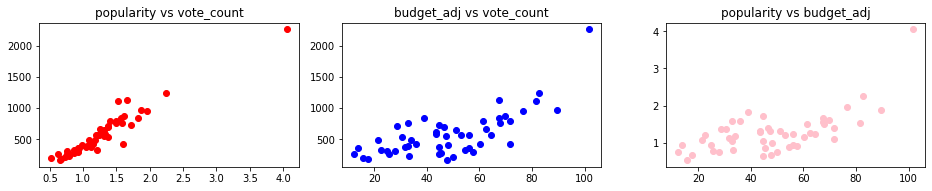

In [33]:
#plt.subplot(1,3,1)
plt.axes ([0.05,0.05,0.6,0.5])
plt.title('popularity vs vote_count')
plt.scatter(pop_vs_budget['popularity'],pop_vs_budget['vote_count'], color = 'red')

#plt.subplot(1,3,2)
plt.axes ([0.75,0.05,0.6,0.5])
plt.title('budget_adj vs vote_count')
plt.scatter(pop_vs_budget['budget_adj'],pop_vs_budget['vote_count'], color = 'blue')

#plt.subplot(1,3,3)
plt.axes ([1.5,0.05,0.6,0.5])
plt.title('popularity vs budget_adj')
plt.scatter(pop_vs_budget['budget_adj'],pop_vs_budget['popularity'], color = 'pink');




___There is no direct relation ship between Budget - Vote Count and Budget -popularity. But there is an upward trend.
Popularity vs vote count seams to be more related, but still there are outsiders, so we cannot make any direct inference froum that data without statistical test which is not the part of this project.


In [34]:
10864-9835

1029

## Limitations

<br>

>Due to null values in production companies, 1029 rows were dropped, which is a considerable number in the database of 10864 rows.

<br>

>Note that we do not have any info on how popularity is calculated. Therefore no causality claims were made only correlation was mentioned.

<a id='conclusions'></a>
## Conclusions

<a id='Assumptions'></a>
> **Assumptions**: 
<br>
> 1 -Popularity is rounded to one digit.
<br>
> 2 -Budget is converted to millions and rounded to integers. 
<br>
> 3 -pc_analysis dataframe is created to be able to analyze Production Companies distinctively, if there are 3  info companies were insterted to production companies cell,they are separeted and  all of them is counted to be a producer of that film. 


> **Findings**: 
<br>
> **Question1**
<br>
Both popularity and budget was skewed to right, and therefore southwest of scatterplot was full of unreadable data, therefore we had to make a limitation or grouping to make any inference. 
<br>
So I grouped films according to their popularity(note that popularity was rounded to 1 digit) than found the average budget for corresponding popularity group. There is no relation found in general graph but it is found that there is a positive correlation between popularity and average budget for movies with popularity less than 5
<br>
<br>
> **Question2**
There is no direct relation ship between Budget - Vote Count and Budget -popularity. But there is an upward trend.
Popularity vs vote count seams are positively correlated.